In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, LabelEncoder,RobustScaler,PolynomialFeatures, OrdinalEncoder
import heejin
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import cv2

In [23]:
mnist = fetch_openml('mnist_784', as_frame=False,parser='auto')

In [24]:
X,y = mnist['data'], mnist['target']

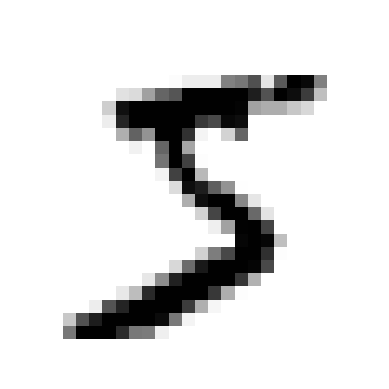

In [25]:
def plot_digit(image_data): 
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
plot_digit(X[0])
plt.show()

In [26]:
y[0]

'5'

In [27]:
xtrain,xtest,ytrain,ytest = X[:60000], X[60000:], y[:60000], y[60000:]

In [28]:
# 1 감지기 - 이진 분류기
ytrain_1 = (ytrain =='1')
ytest_1 = (ytest =='1')

In [29]:
sgd_clf = SGDClassifier(random_state=11)
sgd_clf.fit(xtrain,ytrain_1)

SGDClassifier(random_state=11)

In [30]:
sgd_clf.n_iter_ # 모델 학습 65번

149

In [31]:
sgd_clf.score(xtrain,ytrain_1),sgd_clf.score(xtest,ytest_1) # 최적적합

(0.98685, 0.9866)

In [32]:
sgd_clf.predict(xtest[[1]]), ytest_1[1]

(array([False]), False)

In [33]:
# 내가 그린 이미지로 예측
num_9 = cv2.imread('../data/my_num.png', cv2.IMREAD_GRAYSCALE)

num_9 = cv2.resize(num_9, (28, 28))
num_9 = abs(num_9.astype('int') - 255)  # 255 : 흰색 0 : 검은색  
num_9 = num_9.ravel()

In [34]:
sgd_clf.predict([num_9])

array([False])

In [35]:
# partial_fit()
sgd_model = SGDClassifier(random_state=11)
trainList = []
testList = []

for n in range(100):
    sgd_model.partial_fit(xtrain, ytrain, list(set(ytrain)))
    trainscore = sgd_model.score(xtrain, ytrain)
    testscore = sgd_model.score(xtest, ytest)
    print(f'[{n + 1}번 학습] {trainscore, testscore}')
    trainList.append(trainscore)
    testList.append(testscore)

[1번 학습] (0.8195166666666667, 0.8169)
[2번 학습] (0.8591666666666666, 0.8557)
[3번 학습] (0.8548166666666667, 0.8533)
[4번 학습] (0.8674, 0.8623)
[5번 학습] (0.82225, 0.8192)
[6번 학습] (0.77625, 0.776)
[7번 학습] (0.8194333333333333, 0.811)
[8번 학습] (0.8524333333333334, 0.8472)
[9번 학습] (0.86555, 0.8582)
[10번 학습] (0.8043833333333333, 0.8022)
[11번 학습] (0.8548333333333333, 0.8501)
[12번 학습] (0.8034833333333333, 0.8001)
[13번 학습] (0.8242666666666667, 0.8189)
[14번 학습] (0.8560333333333333, 0.8528)
[15번 학습] (0.8547333333333333, 0.8483)
[16번 학습] (0.8717666666666667, 0.8671)
[17번 학습] (0.82575, 0.8189)
[18번 학습] (0.8631333333333333, 0.8575)
[19번 학습] (0.8603166666666666, 0.8555)
[20번 학습] (0.8114833333333333, 0.801)
[21번 학습] (0.84725, 0.8401)
[22번 학습] (0.8836166666666667, 0.8802)
[23번 학습] (0.8865166666666666, 0.879)
[24번 학습] (0.8566166666666667, 0.8502)
[25번 학습] (0.8608, 0.8578)
[26번 학습] (0.83865, 0.8345)
[27번 학습] (0.8684, 0.8637)
[28번 학습] (0.7989166666666667, 0.7932)
[29번 학습] (0.87285, 0.8659)
[30번 학습] (0.85975, 0.854

Text(0.5, 1.0, '[Train-Test]')

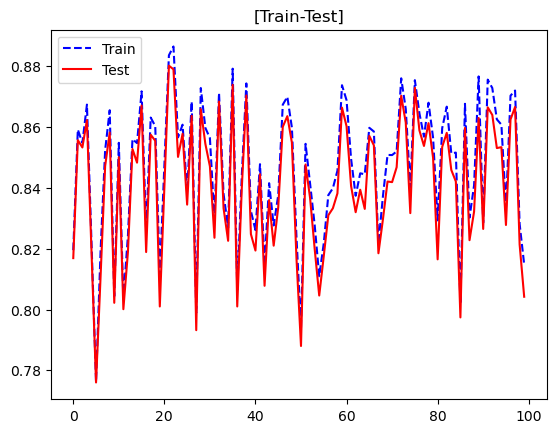

In [36]:
# 시각화
plt.plot(trainList,'b--', label = 'Train')
plt.plot(testList,'r-',label = 'Test')
plt.legend()
plt.title('[Train-Test]')

In [37]:
ypre = sgd_model.predict(xtest)
classification_report(ytest,ypre)

'              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94       980\n           1       0.97      0.89      0.93      1135\n           2       0.90      0.77      0.83      1032\n           3       0.94      0.79      0.85      1010\n           4       0.89      0.89      0.89       982\n           5       0.90      0.53      0.66       892\n           6       0.95      0.90      0.92       958\n           7       0.96      0.82      0.88      1028\n           8       0.40      0.96      0.56       974\n           9       0.90      0.52      0.65      1009\n\n    accuracy                           0.80     10000\n   macro avg       0.87      0.80      0.81     10000\nweighted avg       0.87      0.80      0.82     10000\n'

In [43]:
# 로지스틱 회귀
model = LogisticRegression(random_state=11 ,max_iter=10000, solver='lbfgs')
model.fit(xtrain, ytrain)

C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, random_state=11)

In [41]:
model.score(xtrain, ytrain),model.score(xtest, ytest)

TypeError: fit() got an unexpected keyword argument 'max_iter'

In [40]:
model.predict([num_9]) # 9 good

array(['4'], dtype=object)